## PROJECT 2 - RISK ANALYTICS ASSESSMENT
### SARAH NKEREUWEM

## SCENERIO
### The Analytics team has been tasked to help the Collections team in the borrowers that are rolling forward from an early due stage to later due stages. For that you are given a dataset that contains customers that have been in an early due stage (1-30 days delinquent) and some of their main attributes.
### Your task:
### a) Predict whether the loan rolled or not rolled
### b) What is your prediction accuracy

Use python or R for the process (data prep and exploration, modelling...) and create a presentation
sharing the process and final observations and recommendations (google slide, powerpoint or .pdf are fine):

In the presentation, share the process and findings (alongside with the 
attributes used for the classification). Also include a summary section with the highlights.

Dataset Description:

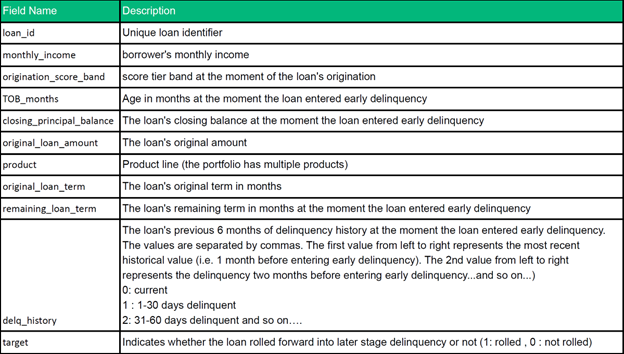

## IMPORT MODULES AND REQUIRED PACKAGES

In [3]:
pwd

'C:\\Users\\imeht\\Documents'

In [55]:
#Defining libraries and importing the data into J.notebook
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
!pip3 install xgboost
from xgboost import XGBClassifier
import warnings

# IMPORT AND LOAD DATASET
LP =pd.read_csv("dataset_risk_analytics.csv") 
LP

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


In [5]:
#Show descriptive statistics of all all numerical columns
LP.describe()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
count,5783.000000,5406.000000,5783.000000,5406.000000,5406.000000,5406.000000,5783.000000,5783.000000,5783.000000
mean,3625.042711,14314.372919,3.904029,28.385683,5714.391417,6630.701073,62.023517,39.618364,0.302092
std,1516.292643,13799.514988,1.490877,16.357494,7837.483534,8491.265603,23.774170,25.004423,0.459205
min,1000.000000,750.000000,1.000000,6.000000,100.000000,100.000000,12.000000,0.000000,0.000000
25%,2310.500000,6000.000000,3.000000,17.000000,1380.000000,1800.000000,60.000000,23.000000,0.000000
50%,3623.000000,9750.000000,4.000000,24.000000,3000.000000,3750.000000,60.000000,40.000000,0.000000
75%,4934.500000,17250.000000,5.000000,38.000000,6800.000000,8100.000000,60.000000,51.000000,1.000000
max,6249.000000,99750.000000,8.000000,83.000000,88200.000000,90000.000000,192.000000,177.000000,1.000000


## DATA PROCESSING

In [6]:
#Examine the data and check for missing values
LP.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    5783 non-null   int64  
 1   monthly_income             5406 non-null   float64
 2   origination_score_band     5783 non-null   int64  
 3   TOB_months                 5406 non-null   float64
 4   closing_principal_balance  5406 non-null   float64
 5   original_loan_amount       5406 non-null   float64
 6   product                    5783 non-null   object 
 7   original_loan_term         5783 non-null   int64  
 8   remaining_loan_term        5783 non-null   int64  
 9   delq_history               5406 non-null   object 
 10  target                     5783 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 497.1+ KB


In [5]:
LP.head(30)

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
5,1005,60000.0,5,72.0,13500.0,18000.0,B,60,52,"0,0,0,0,0,0",0
6,1006,15750.0,3,71.0,2700.0,4800.0,B,59,52,"0,0,0,0,0,0",0
7,1007,51000.0,3,70.0,12600.0,15300.0,B,60,54,"0,0,0,0,0,0",1
8,1008,6000.0,4,68.0,600.0,1800.0,B,23,19,"0,0,0,0,0,0",1
9,1009,26250.0,5,68.0,4800.0,7800.0,B,60,56,"0,0,0,0,0,0",1


In [7]:
LP.tail(20)

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
5763,6230,6750.0,3,8.0,4500.0,5250.0,B,60,56,"0,0,0,0,0,0",0
5764,6231,3750.0,3,9.0,3000.0,3000.0,A,63,58,"0,0,0,0,0,0",0
5765,6232,14250.0,5,10.0,10500.0,10500.0,A,180,175,"0,0,0,0,0,0",0
5766,6233,18000.0,6,10.0,13500.0,13500.0,A,60,54,"0,0,0,0,0,0",1
5767,6234,20250.0,4,10.0,15000.0,15000.0,D,60,61,"0,0,0,0,0,0",0
5768,6235,15000.0,3,9.0,11250.0,11250.0,A,63,58,"0,0,0,0,0,0",1
5769,6236,2250.0,3,9.0,1500.0,1500.0,C,36,32,"0,0,0,0,0,0",1
5770,6237,3000.0,2,9.0,2250.0,2250.0,A,120,114,"0,0,0,0,0,0",0
5771,6238,2250.0,7,9.0,1500.0,1500.0,C,36,32,"1,1,1,0,0,0",0
5772,6239,18000.0,4,8.0,13500.0,13500.0,A,180,177,"1,0,0,0,0,0",0


In [8]:
#Data cleaning process
#1. Remove null values
LP.isnull().sum()

loan_id                        0
monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
delq_history                 377
target                         0
dtype: int64

In [10]:
#2. Remove duplicates and return distinct values only
LP.duplicated().sum()

533

In [12]:
LP = LP.drop_duplicates(keep = "first")

In [13]:
#Verify
LP.duplicated().sum()

0

In [14]:
LP = LP.dropna()


In [13]:
#Verify
LP.head(30)

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
5,1005,60000.0,5,72.0,13500.0,18000.0,B,60,52,"0,0,0,0,0,0",0
6,1006,15750.0,3,71.0,2700.0,4800.0,B,59,52,"0,0,0,0,0,0",0
7,1007,51000.0,3,70.0,12600.0,15300.0,B,60,54,"0,0,0,0,0,0",1
8,1008,6000.0,4,68.0,600.0,1800.0,B,23,19,"0,0,0,0,0,0",1
9,1009,26250.0,5,68.0,4800.0,7800.0,B,60,56,"0,0,0,0,0,0",1


In [15]:
# Confirm rows and columns
LP.shape

(4873, 11)

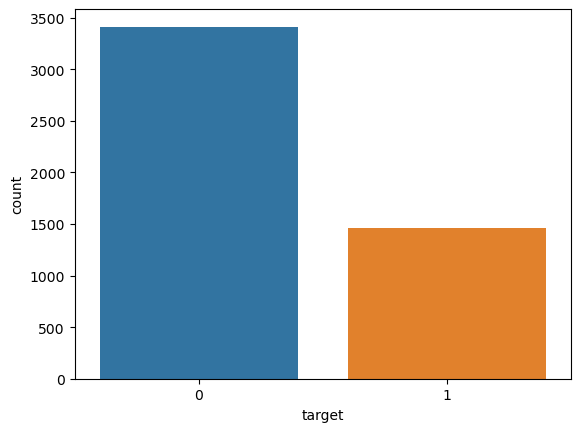

In [16]:
sns.countplot(x="target", data =LP)  #To project the target outcome
plt.show()

In [25]:
LP["target"].value_counts()
#Projected target shows that 1460 of the loan rolled over while 3413 did not

0    3413
1    1460
Name: target, dtype: int64

In [18]:
#Checking for correlation between columns to determine which variable (column) is relevant (reduces training time)
LP.corr()   

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
loan_id,1.000000,-0.030724,-0.000675,-0.060956,-0.011861,-0.016304,0.014253,0.044966,0.006515
monthly_income,-0.030724,1.000000,0.025765,0.157018,0.750378,0.754162,0.034940,-0.016172,-0.049122
origination_score_band,-0.000675,0.025765,1.000000,-0.002932,0.018781,0.017163,-0.001301,-0.015659,0.104942
TOB_months,-0.060956,0.157018,-0.002932,1.000000,0.019371,0.116784,0.020986,-0.442488,0.042655
closing_principal_balance,-0.011861,0.750378,0.018781,0.019371,1.000000,0.981470,0.045553,0.042369,-0.038322
original_loan_amount,-0.016304,0.754162,0.017163,0.116784,0.981470,1.000000,0.024656,-0.012028,-0.038077
original_loan_term,0.014253,0.034940,-0.001301,0.020986,0.045553,0.024656,1.000000,0.793162,-0.004111
remaining_loan_term,0.044966,-0.016172,-0.015659,-0.442488,0.042369,-0.012028,0.793162,1.000000,0.001385
target,0.006515,-0.049122,0.104942,0.042655,-0.038322,-0.038077,-0.004111,0.001385,1.000000


In [19]:
#Using the Pearson correlation coefficient, You can see positive correlations (values closer to 1) between "monthly_income", "closing_principal_balance" and "original_loan_amount."

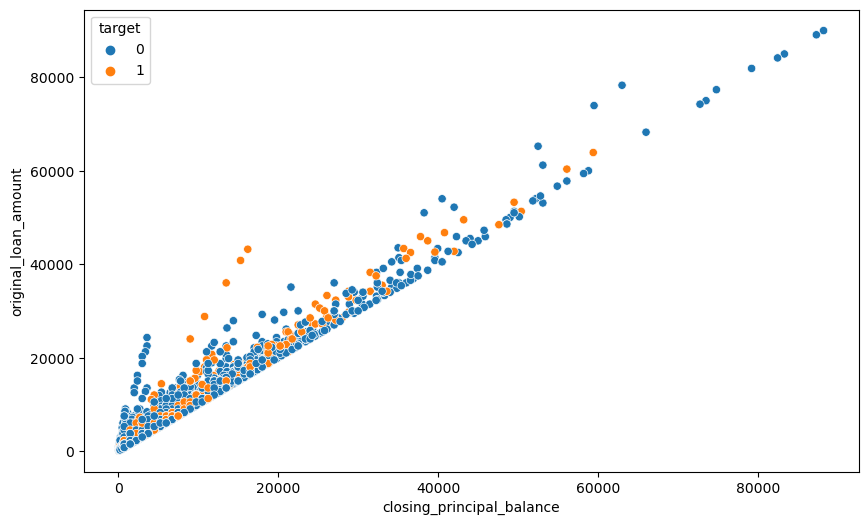

In [20]:
#Confirming correlation between the cloumns
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=LP, x="closing_principal_balance", y="original_loan_amount", hue="target") 
plt.show()   #(CPB:0.750378 & OLA:0.754162)

In [21]:
#Converting product object data type to mumeric value by encoding the categorical feature
oe1 = OrdinalEncoder()
LP['product'] = oe1.fit_transform(LP[['product']])
LP

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,1.0,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,1.0,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,1.0,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,1.0,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,1.0,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,0.0,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,2.0,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,3.0,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,3.0,60,65,"0,0,0,0,0,0",1


In [29]:
#Split the data into training and test data sets
x = LP[["monthly_income", "origination_score_band", "TOB_months", "closing_principal_balance", "original_loan_amount", "original_loan_term", "remaining_loan_term"]].values
x = x.reshape(-1,7)
x

array([[6.00e+03, 5.00e+00, 8.30e+01, ..., 1.80e+03, 2.40e+01, 5.00e+00],
       [3.90e+04, 5.00e+00, 8.20e+01, ..., 1.17e+04, 6.00e+01, 4.20e+01],
       [1.80e+04, 5.00e+00, 7.80e+01, ..., 5.40e+03, 6.00e+01, 4.60e+01],
       ...,
       [3.75e+03, 5.00e+00, 6.00e+00, ..., 3.00e+03, 6.00e+01, 6.50e+01],
       [9.75e+03, 7.00e+00, 6.00e+00, ..., 7.50e+03, 6.00e+01, 6.50e+01],
       [2.25e+03, 6.00e+00, 6.00e+00, ..., 1.50e+03, 3.60e+01, 3.50e+01]])

In [23]:
y = LP["target"].values
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
#I took the mean of the variables to predict the risk of loan roll over
monthly_income = 14314.4
origination_score_band = 4
TOB_months = 29
closing_principal_balance = 5714.4
original_loan_amount = 6630.7 
original_loan_term = 62
remaining_loan_term = 40

prediction = model.predict([[monthly_income, origination_score_band, TOB_months, closing_principal_balance,
                            original_loan_term, remaining_loan_term]])

if prediction[0]==1:
    print("High risk and unlikely to repay loan")
else:
    print("Low risk and likely to repay loan")

Low risk and likely to repay loan


In [30]:
#LOGISTIC REGRESSION
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=20)

In [33]:
model = LogisticRegression()
model.fit(X_train,y_train)
#Predict model
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Evaluate the Model:  Calculate performance metrics, such as accuracy, confusion matrix, and classification report, to assess how well the model performs.

In [35]:
#Apply confusion matrix
CM = confusion_matrix(y_test, y_predict)
CM

array([[1001,    4],
       [ 452,    5]], dtype=int64)

In [36]:
#Accuracy Score
accuracy_score(y_test,y_predict) *100

68.80984952120383

<AxesSubplot:>

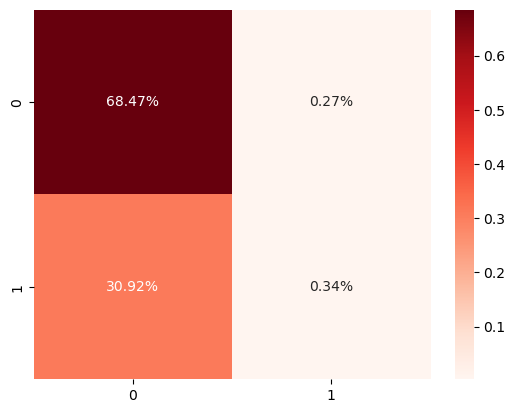

In [37]:
#Show CM heat map
sns.heatmap(CM/np.sum(CM), annot = True, fmt = '0.2%', cmap = 'Reds')

##### True positive- 68.47%
##### True negative- 30.92%
##### False positive- 0.27%
##### False negative- 0.34%

In [85]:
#Classification report
Report = classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1005
           1       0.99      0.92      0.95       457

    accuracy                           0.97      1462
   macro avg       0.98      0.96      0.97      1462
weighted avg       0.97      0.97      0.97      1462



In [46]:
#XGBOOST
model = XGBClassifier () 

In [47]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [49]:
accuracy = accuracy_score(y_test, y_pred) *100
accuracy

99.04240766073872

##### This means that XGBoost is correctly classifying approximately 99% of the data. However, this could also be a sign of overfitting.

In [50]:
#KNN CLASSIFICATION
k = 2
knn = KNeighborsClassifier(n_neighbors=k)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [57]:
y_pred = knn.predict(X_test)
warnings.filterwarnings("ignore", category=FutureWarning)

In [64]:
accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.6621067031463749

In [67]:
y_prediction = knn.predict(X_test)
y_actual=y_test
CM = confusion_matrix(y_actual, y_prediction)

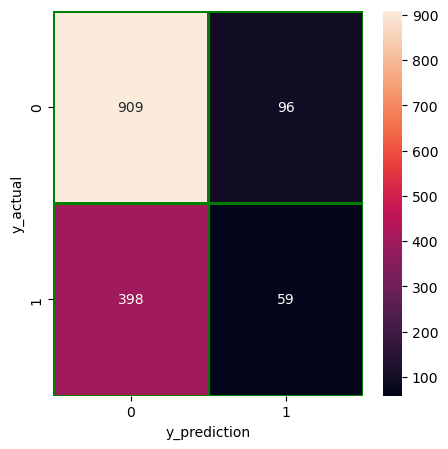

In [68]:
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(CM, annot = True, linewidths=1, linecolor = "green", fmt = ".0f", ax =ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [69]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 42 )

In [70]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
#Make predictions
y_pred = clf.predict(X_test)
print()

In [75]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 

Accuracy: 0.9705882352941176


In [76]:
#Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1000    5]
 [  38  419]]


In [79]:
#Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1005
           1       0.99      0.92      0.95       457

    accuracy                           0.97      1462
   macro avg       0.98      0.96      0.97      1462
weighted avg       0.97      0.97      0.97      1462

